In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

In [47]:
df = pd.read_csv('../data/aqar.csv')

In [57]:
df.drop(['Unnamed: 0.1' , 'Unnamed: 0'] ,axis=1 , inplace=True)

In [97]:
df.iloc[0]

user_id                                                      1495817
id                                                           4596035
title              شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...
price                                                          20000
content                                                           11
imgs                                                               3
refresh                                   ['2022-08-06', '12:22:15']
beds                                                               3
livings                                                          0.0
wc                                                                 2
area                                                           225.0
street_width                                                    15.0
age                                                              9.0
last_update                               ['2022-08-06', '12:22:15']
ketchen                           

In [96]:
df.isnull().sum()

user_id               0
id                    0
title                 0
price                 0
content               0
imgs                  0
refresh               0
beds                  0
livings               2
wc                    0
area                175
street_width        210
age                 705
last_update           0
ketchen              17
ac                   19
furnished            45
location              0
path                  0
user                  0
district              0
width              2100
length             2100
advertiser_type     240
create_time           0
review              399
profileImg            0
UserName             93
iam_verified          0
rega_id               0
sold                  0
soldAt                0
dtype: int64

<AxesSubplot:>

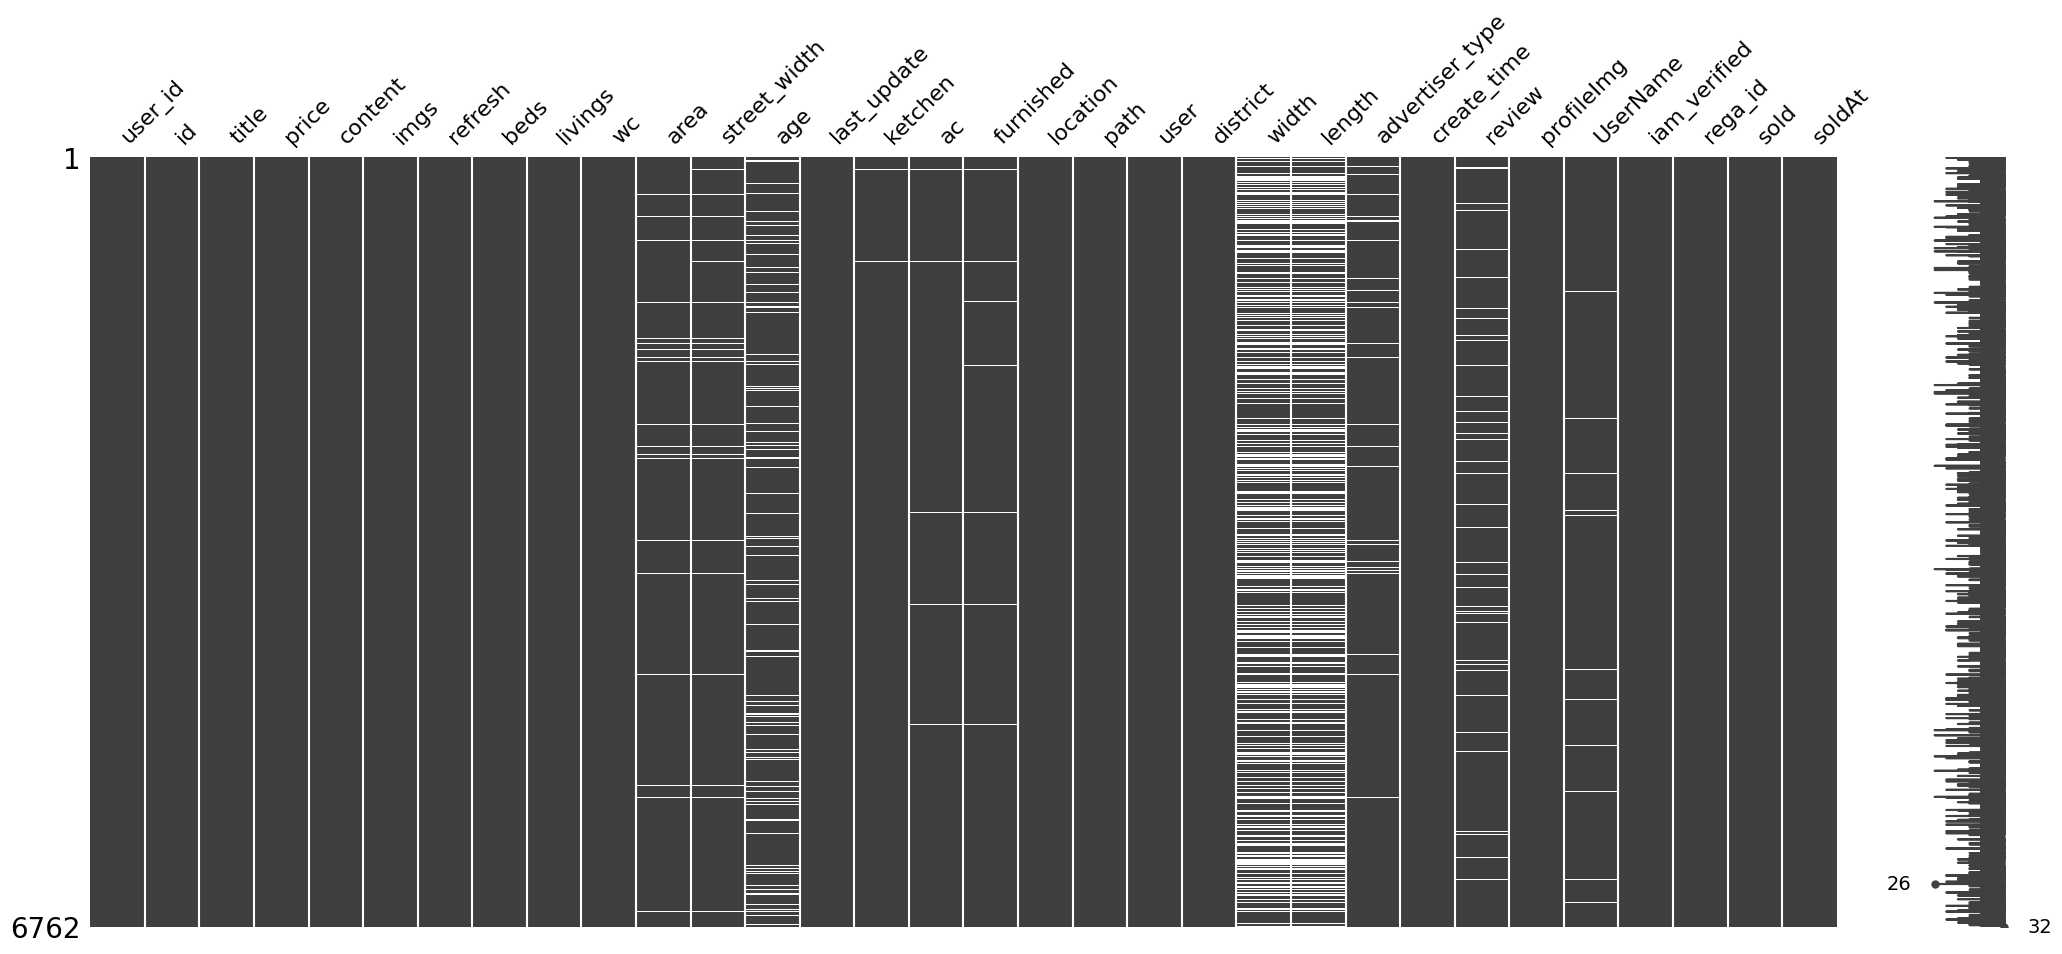

In [95]:
msno.matrix(df)


In [145]:
df['location'].isnull().sum()

0

In [50]:
df['profileImg'].fillna(False , inplace=True)

In [51]:
for index , row in df.iterrows()   :
    # print(row['profileImg'] )
     if (row['profileImg'] != False) :
        df['profileImg'][index] = True

/tmp/ipykernel_19116/3280180632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profileImg'][index] = True


In [52]:
df['profileImg'].value_counts()

True     4016
False    2746
Name: profileImg, dtype: int64

In [53]:
len(df['content'][0])

11

In [54]:
df['content'].fillna('0' , inplace=True)

In [55]:
for index , row in df.iterrows():
    df['content'][index] = len(row['content'])

/tmp/ipykernel_19116/3469686288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'][index] = len(row['content'])


In [63]:
df['iam_verified'].fillna(False , inplace=True)

In [64]:
df['iam_verified'].value_counts()

True     6604
False     158
Name: iam_verified, dtype: int64

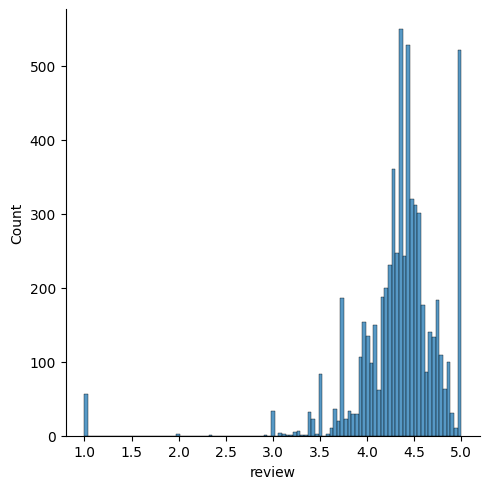

In [56]:
# df['review'].median()
sns.displot(df, x="review")

In [80]:
a = df['imgs'][0]
a

"['014958174_1659666836308.jpg', '014958178_1659666836077.jpg', '014958172_1659666837295.jpg']"

In [ ]:
len(ast.literal_eval(a))

In [86]:
df['imgs'].fillna(0 , inplace = True)

In [88]:
df['imgs']

0       ['014958174_1659666836308.jpg', '014958178_165...
1       ['004966630_1659781493595.jpg', '004966636_165...
2       ['023243548_1658701693777.jpg', '023243549_165...
3       ['019065004_1659758037501.jpg', '019065000_165...
4       ['017415629_1657025837185.jpg', '017415620_165...
                              ...                        
6757                                                    0
6758                                                    0
6759                                                    0
6760                                                    0
6761                                                    0
Name: imgs, Length: 6762, dtype: object

True

In [93]:
for index , row in df.iterrows():
    if row['imgs'] == 0 :
        continue
    else:
        a= row['imgs']
        df['imgs'][index] = len(ast.literal_eval(a))

/tmp/ipykernel_19116/4095940630.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imgs'][index] = len(ast.literal_eval(a))


In [94]:
df['imgs'].value_counts()

8     880
0     643
7     539
6     505
5     482
9     433
10    397
4     386
1     322
12    318
11    316
3     269
13    213
14    170
15    154
16    145
2     129
18     90
17     86
19     59
21     36
20     36
22     32
23     23
24     21
26     21
30     15
27     14
25     10
28      9
29      7
31      1
37      1
Name: imgs, dtype: int64

In [146]:
a = df['location'][0]
a

"{'lat': 24.80093, 'lng': 46.89689, '__typename': 'Location'}"

In [103]:
print('\"')

"


In [147]:
a = a.replace('\''  , '\"' )

In [132]:
a = json.loads(a)
# a

In [137]:
a

{'lat': 24.80093, 'lng': 46.89689, '__typename': 'Location'}

In [140]:
a.get('lng')

46.89689

In [142]:
df['lat'] = 0
df['lng'] = 0

In [151]:
for index , row in df.iterrows() :
    a = row['location'] 
    a = a.replace('\''  , '\"' )
    a= json.loads(a)
    df['lat'][index] =  a.get('lat')
    df['lng'][index] =  a.get('lng')

/tmp/ipykernel_19116/3726828350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat'][index] =  a.get('lat')
/tmp/ipykernel_19116/3726828350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lng'][index] =  a.get('lng')


In [157]:
df.drop(['location'] , axis = 1 , inplace=True)